# 2015104013 김형민 머신러닝개론 과제 2-2번. 다항 분류

### 기본 import 및 설정

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils

np.random.seed(35)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import tensorflow as tf
from tensorflow import keras

### Mnist dateset 불러오기 및 예시출력

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("X_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", x_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, '5')

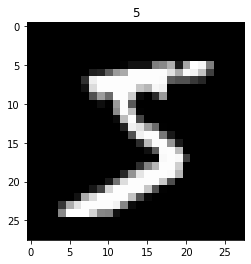

In [3]:
plt.imshow(x_train[0], cmap='gray')
plt.title(y_train[0])

### Dataset 지정 및 전처리

In [4]:
width = 28
height = 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

In [5]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

#데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

### Model 설정

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Model 학습과정 설정

In [7]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Model 학습

In [8]:
# 30번 다하면 너무 오래걸림. 10번으로 조정
hist = model.fit(x_train, y_train, 
                 epochs=10, batch_size=32, validation_data=(x_val, y_val))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 23s 469us/step - loss: 0.3133 - accuracy: 0.8705 - val_loss: 0.1527 - val_accuracy: 0.9473
Epoch 2/10
50000/50000 [==============================] - 23s 462us/step - loss: 0.1185 - accuracy: 0.9575 - val_loss: 0.0776 - val_accuracy: 0.9742
Epoch 3/10
50000/50000 [==============================] - 22s 441us/step - loss: 0.0799 - accuracy: 0.9718 - val_loss: 0.1043 - val_accuracy: 0.9597
Epoch 4/10
50000/50000 [==============================] - 22s 433us/step - loss: 0.0640 - accuracy: 0.9773 - val_loss: 0.0633 - val_accuracy: 0.9782
Epoch 5/10
50000/50000 [==============================] - 21s 423us/step - loss: 0.0554 - accuracy: 0.9809 - val_loss: 0.0522 - val_accuracy: 0.9830
Epoch 6/10
50000/50000 [==============================] - 21s 427us/step - loss: 0.0484 - accuracy: 0.9830 - val_loss: 0.0457 - val_accuracy: 0.9855
Epoch 7/10
50000/50000 [==============================]

### 학습과정 Preview

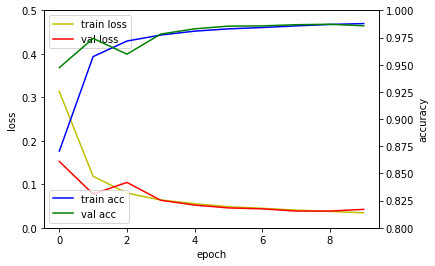

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

accuracy_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

accuracy_ax.plot(hist.history['accuracy'], 'b', label='train acc')
accuracy_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
accuracy_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
accuracy_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
accuracy_ax.legend(loc='lower left')

plt.show()

### Model 평가하기

In [10]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 1s 126us/step
## evaluation loss and metrics ##
[0.03603720670938492, 0.9861999750137329]


### 구한 Model을 기반으로 Mnist 비교

In [11]:
yhat_test = model.predict(x_test, batch_size=32)

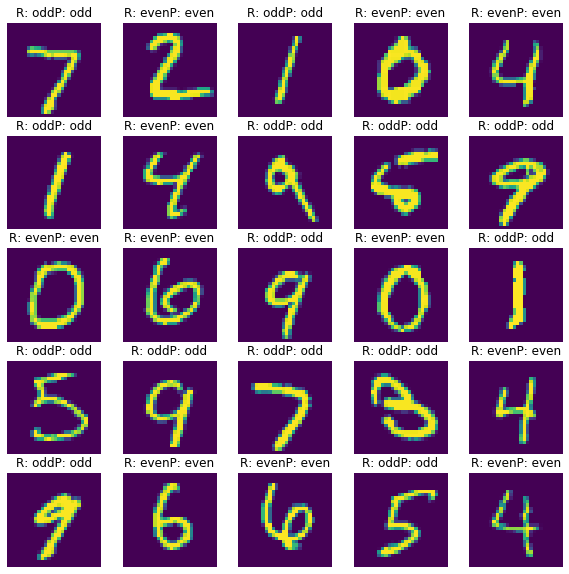

In [12]:
plt_row = 5
plt_col = 5
          
plt.rcParams["figure.figsize"] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd'
    else:
        sub_plt_title += 'even'
        
    sub_plt_title +='P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title +='odd'
    else:
        sub_plt_title +='even'
    
    sub_plt.set_title(sub_plt_title)
    
plt.show()